# MATH 405/607 

# Method of Steepest Descent 
# (Also known as Gradient Descent)

* Optimization problems & Root finding
* Gradient Descent Scheme
* Error Analysis
* Global Convergence

### Literature 

* [Boyd and Vandenberghe, Convex Optimization, Chapter 9](https://web.stanford.edu/~boyd/cvxbook/)

In [1]:
include("math405.jl")

## Optimization Problems

**Motivation:** Finding the minimum ("optimum") points of a function numerically. 

**Fundamental Principle:** By following the opposite direction of its gradient in each iteration.

In other words, step towards where the function decreases the fastest. ("Steepest" descent)


Simple example:

Finding the minimum of
$$f(x,y) = x^2 + y^2 $$


### Formulation
Given a function $f \in \mathbb{R}^M$, which we need to find its minimum.

Starting at some initial guess: $U_0 = \begin{pmatrix} 
    x_{1, 0} \\ x_{2, 0} \\ \vdots \\ x_{M, 0}
    \end{pmatrix}$

The gradient of the function at this point is given by 
$$\nabla f(U_n)= 
    \begin{pmatrix} 
    \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_M}
    \end{pmatrix} \, \Bigg|_{\,U_n}$$

Then, we define the Gradient Descent Scheme:

$$ U_{n+1} = U_n + h\big( -\nabla f(U_n)\big)$$

Where $h$ is the step size

With the exit condition being $\lVert \nabla f(U_k) \rVert \leq \epsilon$ for some small tolerance $\epsilon$


### Advantage of the Gradient Descent Scheme:

* Resilient to not so "nice" functions (Whose higher order derivatives does not exist or have unwanted zeros)
* Moderate computation complexity (Requires only first order derivative)
* Consistent convergence rate & Globally convergent


### Comparison to Newton's Method in Optimization （1-D Case)
The Newton's Method of Optimization is defined as 
$$U_{n+1} = U_n - h\frac{f'(U_n)}{f''(U_n)}$$
(Finding the root of derivative instead of $f^0(x)$)

Where the 1-D Gradient Descent Method is 
$$ U_{n+1} = U_n - hf'(U_n)$$

Newton's Method requires $f''(U_n)$ to exist and is well-behaved (no nearby zeros)

Where Gradient Descent only requires $f'(U_n)$ to exist

### Example:
Finding the minimum of $f(x) = cos(x)$ within $(0, \pi)$ 

##### Newton's Method:

In [7]:
f = x -> cos(x)
df = x -> ForwardDiff.derivative(f, x)
d2f = x -> ForwardDiff.derivative(df, x)
h = 0.01
tolerance = 1e-8;

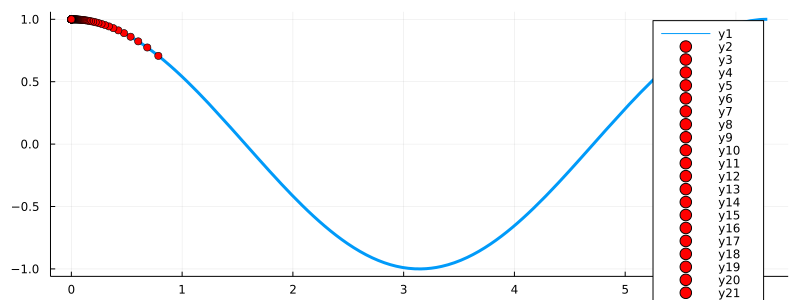

In [8]:
#guess = pi/2+0.00001 # If you QA Engineer is having a bad day he's gonna do this
#Believe or not, this ^^ is so ugly that even Jupyter Lab refused to save the notebook file (throws error 413)
guess = pi/2 + 0.1

x = guess; iter = [x]
p = plot(f, 0.0, 2*pi, lw=3, grid=:xy, size=(800,300))
scatter!([x], [f(x)], ms=4, color=:red)
while(true)
    old_x = x
    x -= h * df(x) / d2f(x) ; push!(iter, x)
    scatter!([x], [f(x)], ms=4, color=:red)
    if abs(old_x - x) <= tolerance
        break
    end
end
p

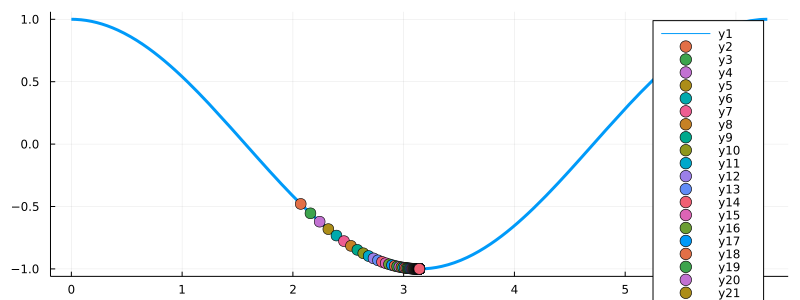

In [3]:
guess = pi/2+0.5

x = guess; iter = [x]
p = plot(f, 0.0, 2*pi, lw=3, grid=:xy, size=(800,300))
scatter!([x], [f(x)], ms=6)
while(true)
    old_x = x
    x -= h * df(x) ; push!(iter, x)
    scatter!([x], [f(x)], ms=6)
    if abs(old_x - x) <= tolerance
        break
    end
end
p